In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from pylab import rcParams
import  scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random
import json
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier


nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def clean(s):
    #Remove punctuations
    s=re.sub(r'[^\w\s]','',s)
    #Remove Digits
    s=re.sub(r"(\d)", "", s)
    #Remove content inside paranthesis
    s=re.sub(r'\([^)]*\)', '', s)    
    #Remove Brand Name
    s=re.sub(u'\w*\u2122', '', s)    
    #Convert to lowercase
    s=s.lower()   
    #Remove Stop Words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(s)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    s=' '.join(filtered_sentence)
    # #Remove low-content adjectives
    # #Porter Stemmer Algorithm
    words = word_tokenize(s)
    word_ps=[]
    for w in words:
        word_ps.append(ps.stem(w))
    s=' '.join(word_ps)
    return s

In [ ]:
ps = PorterStemmer()

file = r'train.json'
with open(file) as train_file:
    dict_train = json.load(train_file)
print(dict_train[0])
file = r'test.json'
with open(file) as test_file:
    dict_test= json.load(test_file)

{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}


In [ ]:
len(dict_train)

39774

In [ ]:
id_ = []
cuisine = []
ingredients = []
for i in range(len(dict_train)):
    id_.append(dict_train[i]['id'])
    cuisine.append(dict_train[i]['cuisine'])
    ingredients.append(dict_train[i]['ingredients'])
df = pd.DataFrame({'id':id_, 
                   'cuisine':cuisine, 
                   'ingredients':ingredients})

In [ ]:
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [ ]:
df['clean_ing'] = df.ingredients.map(lambda x: [clean(i) for i in x])

In [ ]:
df.head()

,id,cuisine,ingredients,clean_ing
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","[romain lettuc, black oliv, grape tomato, garl..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","[plain flour, ground pepper, salt, tomato, gro..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[egg, pepper, salt, mayonais, cook oil, green ..."
3,22213,indian,"[water, vegetable oil, wheat, salt]","[water, veget oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","[black pepper, shallot, cornflour, cayenn pepp..."


In [ ]:
all_unique_ings = set(sum(df['clean_ing'].tolist(), []))

In [ ]:
len(all_unique_ings)

6666

In [ ]:
df['ing_sent'] = df['clean_ing'].map(lambda x: ','.join(x))

In [ ]:
vocabulary = list(all_unique_ings)
tfidf_pip = Pipeline([('count', CountVectorizer(vocabulary=vocabulary)),
                    ('tfid', TfidfTransformer())])

In [ ]:
X = df['ing_sent']

In [ ]:
lb_encoder = preprocessing.LabelEncoder().fit(df['cuisine'])
df['encoded_cuisine'] = lb_encoder.transform(df['cuisine']) 

In [ ]:
Y = df['encoded_cuisine']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0)

In [ ]:
tfidf_pip = tfidf_pip.fit(X_train)

In [ ]:
pipe_svm = Pipeline([
                     ('SVM', SVC(kernel='linear', C=1,gamma=0.01,random_state=0))
                    ])

In [ ]:
scores = cross_val_score( pipe_svm, X_train , y_train , cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

nan accuracy with a standard deviation of nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 196, in fit
    accept_large_sparse=False,
  File "/usr/local/lib/python3.7/dist-packages/sklearn

In [ ]:
model = pipe_svm.fit(tfidf_pip.fit_transform(X_train), y_train)

In [ ]:
model.score(tfidf_pip.fit_transform(X_train), y_train)

0.7948395612684245

In [ ]:
model.score(tfidf_pip.fit_transform(X_test), y_test)

0.7571338780641106

In [ ]:
predicted_train=model.predict(tfidf_pip.fit_transform(X))

In [ ]:
all_cuisines = set(df['cuisine'])

In [ ]:
df

,id,cuisine,ingredients,clean_ing,ing_sent,encoded_cuisine
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","[romain lettuc, black oliv, grape tomato, garl...","romain lettuc,black oliv,grape tomato,garlic,p...",6
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","[plain flour, ground pepper, salt, tomato, gro...","plain flour,ground pepper,salt,tomato,ground b...",16
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[egg, pepper, salt, mayonais, cook oil, green ...","egg,pepper,salt,mayonais,cook oil,green chili,...",4
3,22213,indian,"[water, vegetable oil, wheat, salt]","[water, veget oil, wheat, salt]","water,veget oil,wheat,salt",7
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","[black pepper, shallot, cornflour, cayenn pepp...","black pepper,shallot,cornflour,cayenn pepper,o...",7
...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...","[light brown sugar, granul sugar, butter, warm...","light brown sugar,granul sugar,butter,warm wat...",8
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...","[kraft zesti italian dress, purpl onion, brocc...","kraft zesti italian dress,purpl onion,broccoli...",9
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...","[egg, citru fruit, raisin, sourdough starter, ...","egg,citru fruit,raisin,sourdough starter,flour...",8
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...","[boneless chicken skinless thigh, minc garlic,...","boneless chicken skinless thigh,minc garlic,st...",3


Text(0, 0.5, 'Actual cuisine')

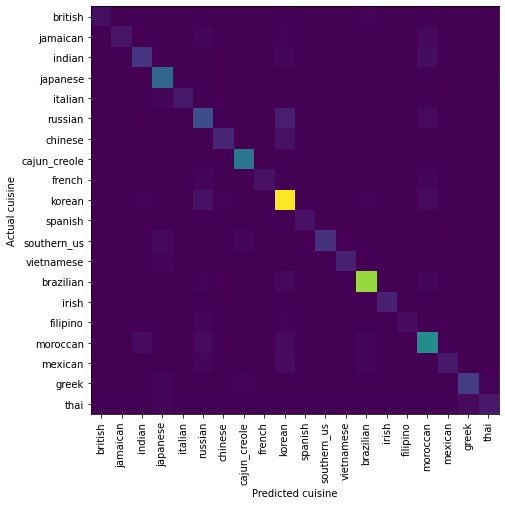

In [ ]:
confusion_matrix = metrics.confusion_matrix(df['encoded_cuisine'], predicted_train)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7.5,7.5))
im = ax.imshow(confusion_matrix)
ax.set_xticks(np.arange(len(all_cuisines)))
ax.set_yticks(np.arange(len(all_cuisines)))
ax.set_xticklabels(all_cuisines, rotation=90)
ax.set_yticklabels(all_cuisines)
ax.set_xlabel('Predicted cuisine')
ax.set_ylabel('Actual cuisine')


In [ ]:
import pickle

# Save the model under the cwd
pkl_filename = "classification_svg_model.pkl"
pickle.dump(model, open(pkl_filename, 'wb'))

In [ ]:
# Save the pip
pkl_filename = "pre_process_pip.pkl"
pickle.dump(tfidf_pip, open(pkl_filename, 'wb'))

In [ ]:
# Save the lb_encoder
pkl_filename = "lb_encoder.pkl"
pickle.dump(lb_encoder, open(pkl_filename, 'wb'))

In [ ]:
# Load the saved model
with open("pre_process_pip.pkl", 'rb') as file:
    loaded_tfidf_pip = pickle.load(file)

In [ ]:
# Load the saved model
with open("classification_svg_model.pkl", 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
# Load the saved model
with open("lb_encoder.pkl", 'rb') as file:
    loaded_lb_encoder = pickle.load(file)

In [ ]:
loaded_model.score(loaded_tfidf_pip.fit_transform(X_test), y_test)

0.7571338780641106

# Clustering

In [ ]:
indDF = pd.read_csv('./data/indian_food.csv.xls')
indDF = indDF.drop(['prep_time','cook_time','flavor_profile','course','state','region' , 'diet'] , axis=1)

In [ ]:
indDF

,name,ingredients
0,Balu shahi,"Maida flour, yogurt, oil, sugar"
1,Boondi,"Gram flour, ghee, sugar"
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins"
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su..."
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,..."
...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur"
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all..."
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ..."
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all..."


In [ ]:
indDF['clean_ing'] = indDF.ingredients.map(lambda x: [clean(i).strip() for i in x.split(',')])

In [ ]:
indDF['ing_sent'] = indDF['clean_ing'].map(lambda x: ','.join(x))

In [ ]:
cuisinePred = loaded_model.predict(loaded_tfidf_pip.fit_transform(indDF['ing_sent']))

In [ ]:
indDF['cusine_predict'] = cuisinePred

In [ ]:
indDF['cusine_name'] = list(map(lambda x: loaded_lb_encoder.classes_[x], cuisinePred))

In [ ]:
indDF.head()

,name,ingredients,clean_ing,ing_sent,cusine_predict,cusine_name
0,Balu shahi,"Maida flour, yogurt, oil, sugar","[maida flour, yogurt, oil, sugar]","maida flour,yogurt,oil,sugar",3,chinese
1,Boondi,"Gram flour, ghee, sugar","[gram flour, ghee, sugar]","gram flour,ghee,sugar",11,japanese
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins","[carrot, milk, sugar, ghee, cashew, raisin]","carrot,milk,sugar,ghee,cashew,raisin",7,indian
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...","[flour, ghee, kewra, milk, clarifi butter, sug...","flour,ghee,kewra,milk,clarifi butter,sugar,alm...",7,indian
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...","[milk powder, plain flour, bake powder, ghee, ...","milk powder,plain flour,bake powder,ghee,milk,...",4,filipino


In [ ]:
all_unique_tokens = indDF.clean_ing.tolist()
all_unique_tokens.append(indDF.cusine_name.tolist())
all_unique_tokens = list(set(sum(all_unique_tokens, [])))

In [ ]:
len(all_unique_tokens)

366

In [ ]:
tfidf_pip = Pipeline([('count', CountVectorizer(vocabulary=all_unique_tokens)),
                    ('tfid', TfidfTransformer())])

In [ ]:
sentences = [i+', '+j for i,j in zip(indDF.ing_sent, indDF.cusine_name)]

In [ ]:
X = tfidf_pip.fit_transform(sentences)

In [ ]:
clusters_num = 40

/var/folders/pb/5rmhgjf15nn4q65__q6r6xg40000gn/T/ipykernel_12443/1791159269.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,clusters_num) , silhouetteSocres ,'bo-' , color='blue' , linewidth=3 , markersize =8)


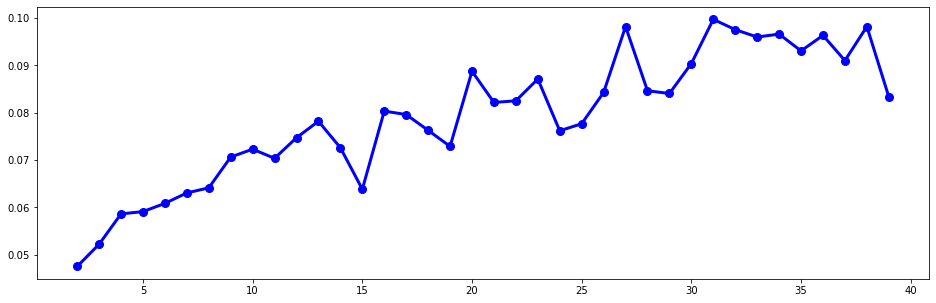

In [ ]:
kmeanPerK = [KMeans(n_clusters=k , random_state=500).fit(X) for k in range(1,clusters_num)]
silhouetteSocres  =  [silhouette_score(X , model.labels_) for model  in kmeanPerK[1:]]
rcParams['figure.figsize'] =16,5
plt.plot(range(2,clusters_num) , silhouetteSocres ,'bo-' , color='blue' , linewidth=3 , markersize =8)

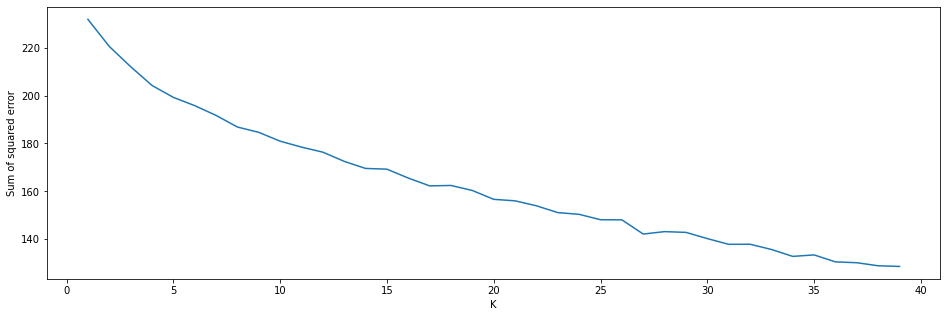

In [ ]:

sse = []
k_rng = range(1,clusters_num)
for k in k_rng:
    km = KMeans(n_clusters=k , random_state=500)
    km.fit(X)
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
km = KMeans(n_clusters=28 , random_state=500)
km.fit(X)

KMeans(n_clusters=28, random_state=500)

In [ ]:
indDF['cluster_num'] = km.predict(X)

In [ ]:
indDF.head()

,name,ingredients,clean_ing,ing_sent,cusine_predict,cusine_name,cluster_num
0,Balu shahi,"Maida flour, yogurt, oil, sugar","[maida flour, yogurt, oil, sugar]","maida flour,yogurt,oil,sugar",3,chinese,26
1,Boondi,"Gram flour, ghee, sugar","[gram flour, ghee, sugar]","gram flour,ghee,sugar",11,japanese,2
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins","[carrot, milk, sugar, ghee, cashew, raisin]","carrot,milk,sugar,ghee,cashew,raisin",7,indian,25
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...","[flour, ghee, kewra, milk, clarifi butter, sug...","flour,ghee,kewra,milk,clarifi butter,sugar,alm...",7,indian,10
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...","[milk powder, plain flour, bake powder, ghee, ...","milk powder,plain flour,bake powder,ghee,milk,...",4,filipino,25


In [ ]:
indDF.to_csv('dishes_with_clusters.csv')

In [ ]:
# Save the model
pkl_filename = "km_model.pkl"
pickle.dump(km, open(pkl_filename, 'wb'))

In [ ]:
# Load the saved model
with open("km_model.pkl", 'rb') as file:
    loaded_km_model = pickle.load(file)

In [ ]:
# Save the model
pkl_filename = "km_tfidf_pip.pkl"
pickle.dump(tfidf_pip, open(pkl_filename, 'wb'))

In [ ]:
# Load the saved model
with open("km_tfidf_pip.pkl", 'rb') as file:
    loaded_km_tfidf_pip = pickle.load(file)

In [ ]:
loaded_dishes = pd.read_csv('dishes_with_clusters.csv')
loaded_indDF = pd.read_csv('./data/indian_food.csv.xls')

# how to predict

In [ ]:
sample = "oil, sugar, meat"

In [ ]:
cuisine = loaded_model.predict(loaded_tfidf_pip.fit_transform([sample]))[0]
cuisine_name = loaded_lb_encoder.classes_[cuisine]

In [ ]:
cluster_num = loaded_km_model.predict(loaded_km_tfidf_pip.fit_transform([f"{sample}, {cuisine_name}"]))[0]

In [ ]:
filterd_df = loaded_dishes[loaded_dishes.cluster_num == cluster_num].sample(5)